# Overview
Takes all of my other classifiers and finds the optimal weights for a voting classifier that I defined.

In [4]:
from ClassifierFunctions import *
import os

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
data_dir = 'SavedData'

In [6]:
data = pickle.load(open(os.path.join(data_dir, 'processed_data.pkl'), 'rb'))

In [7]:
clf_text = pickle.load(open(os.path.join(data_dir, 'clf_text.p'), 'rb'))
clf_text_next = pickle.load(open(os.path.join(data_dir, 'clf_text_next.p'), 'rb'))
clf_text_prev = pickle.load(open(os.path.join(data_dir, 'clf_text_prev.p'), 'rb'))

In [8]:
clf_context = pickle.load(open(os.path.join(data_dir, 'clf_context.p'), 'rb'))

In [9]:
features_dict = pickle.load(open(os.path.join(data_dir, 'features_dict.pkl'), 'rb'))

In [10]:
model_features = []

# context features w/o simple label
top_features =  ['committee_position_prev',
                'committee_position',
                'committee_position_next',

                'simple_label_prev',
                'simple_label_next'
                ]
for feat in top_features:
    # adds every feature in the bottom level list
    model_features += features_dict['context_features'][feat]
    
extra_features =  ['word_count', 
                   '?_count']
model_features += extra_features

Having experimented with this a bit, clf_text_next and clf_text_prev are basically always just set to 0. To simplify my grid search, I've just commented them out. 

In [11]:
classifiers = [(clf_text, 'text'), 
#                (clf_text_next, 'text_next'),
#                (clf_text_prev, 'text_prev'),
               (clf_context, model_features)
               ]

In [12]:
param_grid = {'weights': [None, 
                         [.7, .3], 
                         [.8, .2],
                         [.9, .1], 
                         [1, 0]]}

In [13]:
model = MyVotingClassifier(classifiers)


SCORES:

Average Accuracy: 0.906989063568
Average Precision:  0.880980903036
Average Recall: 0.975555555556
Average F1:  0.925320476076

Pipeline Parameters:
{'weights': [0.9, 0.1]}



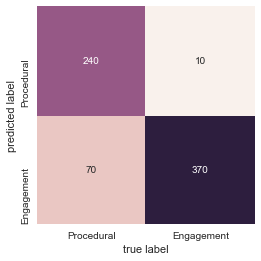

In [14]:
grid = evaluate_model(model, param_grid, data, data.binary_label)

My best estimator is bascially just naive bayes on the text field with a little bit of weighting for the SVM classifier with the context fields. This is the classifier I use for prediction with on the true dataset. 